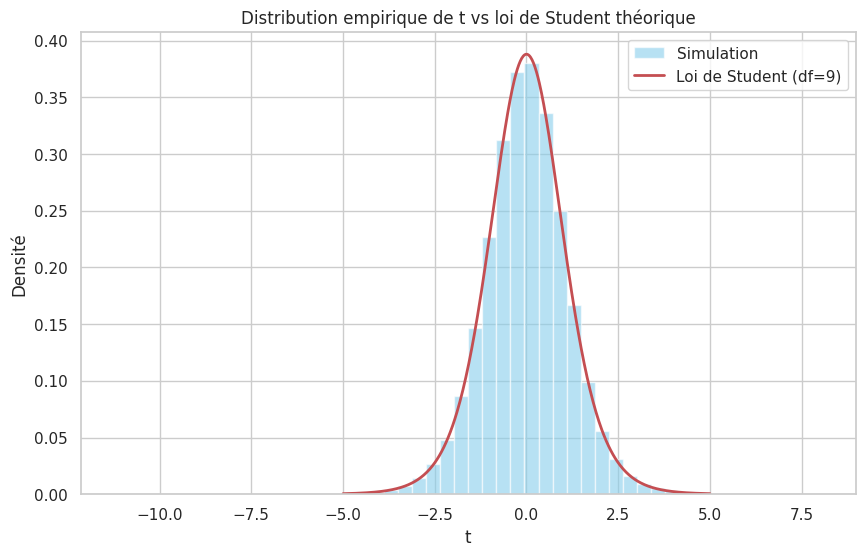

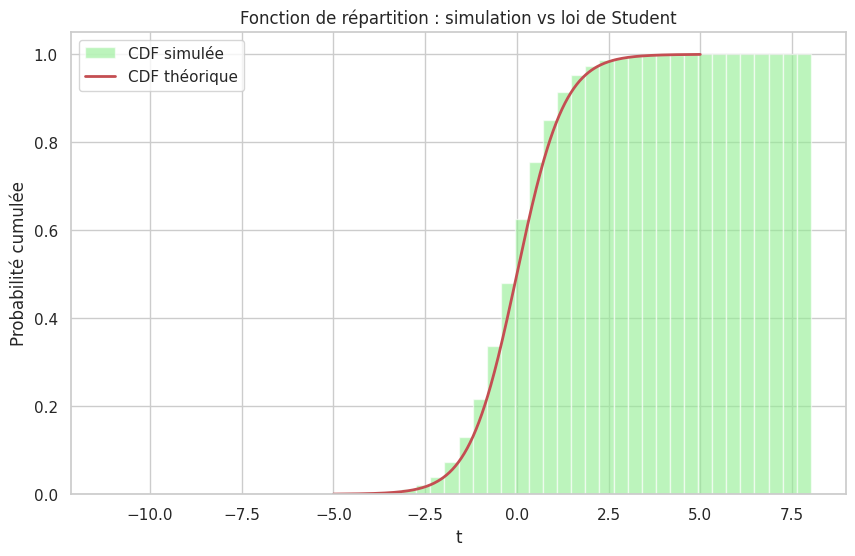

In [25]:
# Objectif : illustrer empiriquement que la statistique t suit
# une loi de Student lorsque l'on √©chantillonne une population normale.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------------
# Param√®tres de la simulation
# -------------------------------------------------------------------
n = 10              # taille d'un √©chantillon
mu = 0              # moyenne th√©orique de la population
sigma = 1           # √©cart-type de la population
n_samples = 200000  # nombre d'√©chantillons simul√©s

# -------------------------------------------------------------------
# G√©n√©ration des √©chantillons et calcul de la statistique t
# -------------------------------------------------------------------
t_values = []

for _ in range(n_samples):
    sample = np.random.normal(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(sample)                 # moyenne √©chantillon
    s = np.std(sample, ddof=1)             # √©cart-type √©chantillon (non-biais√©)
    t = (x_bar - mu) / (s / np.sqrt(n))    # statistique t
    t_values.append(t)

t_values = np.array(t_values)

# -------------------------------------------------------------------
# Comparaison : histogramme simul√© vs densit√© th√©orique
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.hist(t_values, bins=50, density=True, alpha=0.6, color='skyblue', label="Simulation")

df = n - 1  # degr√©s de libert√©
x = np.linspace(-5, 5, 500)
plt.plot(x, stats.t.pdf(x, df), 'r', lw=2, label=f"Loi de Student (df={df})")

plt.title("Distribution empirique de t vs loi de Student th√©orique")
plt.xlabel("t")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# Comparaison des fonctions de r√©partition (CDF)
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.hist(t_values, bins=50, density=True, cumulative=True, alpha=0.6, color='lightgreen', label="CDF simul√©e")
plt.plot(x, stats.t.cdf(x, df), 'r', lw=2, label="CDF th√©orique")

plt.title("Fonction de r√©partition : simulation vs loi de Student")
plt.xlabel("t")
plt.ylabel("Probabilit√© cumul√©e")
plt.legend()
plt.show()


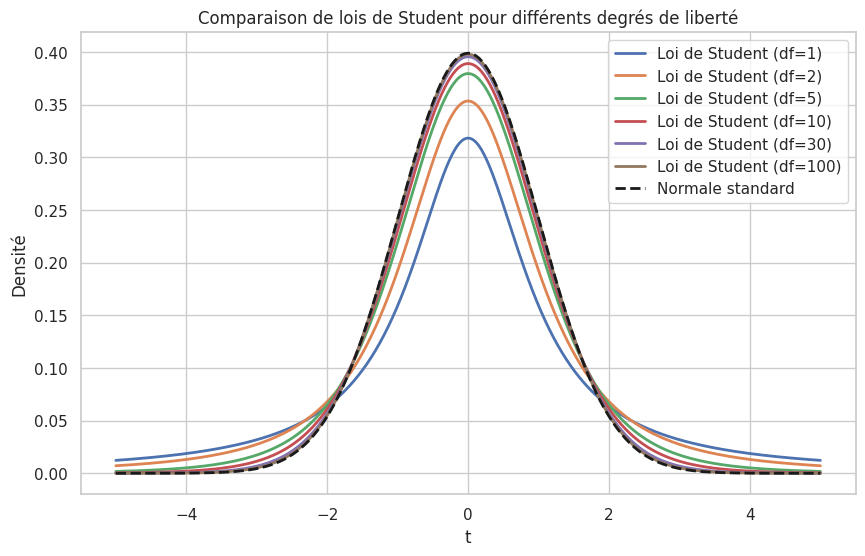

In [26]:
# Objectif : comparer l'influence des degr√©s de libert√© (df) sur la forme
# de la loi de Student, et montrer la convergence vers la loi normale.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------------
# D√©finition des degr√©s de libert√© √† comparer
# -------------------------------------------------------------------
dfs = [1, 2, 5, 10, 30, 100]

# Axe des abscisses
x = np.linspace(-5, 5, 500)

# -------------------------------------------------------------------
# Trac√© des lois de Student pour diff√©rents df
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))

for df in dfs:
    y = stats.t.pdf(x, df)
    plt.plot(x, y, lw=2, label=f"Loi de Student (df={df})")

# -------------------------------------------------------------------
# Ajout de la loi normale standard (moyenne=0, sigma=1)
# -------------------------------------------------------------------
y_norm = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y_norm, 'k--', lw=2, label="Normale standard")

# Mise en forme du graphique
plt.title("Comparaison de lois de Student pour diff√©rents degr√©s de libert√©")
plt.xlabel("t")
plt.ylabel("Densit√©")
plt.legend()
plt.show()


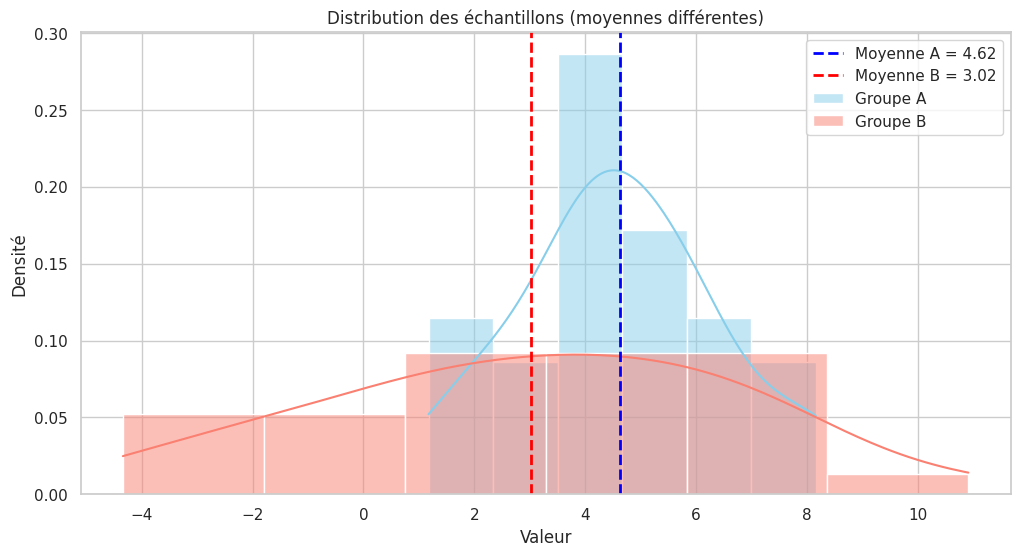

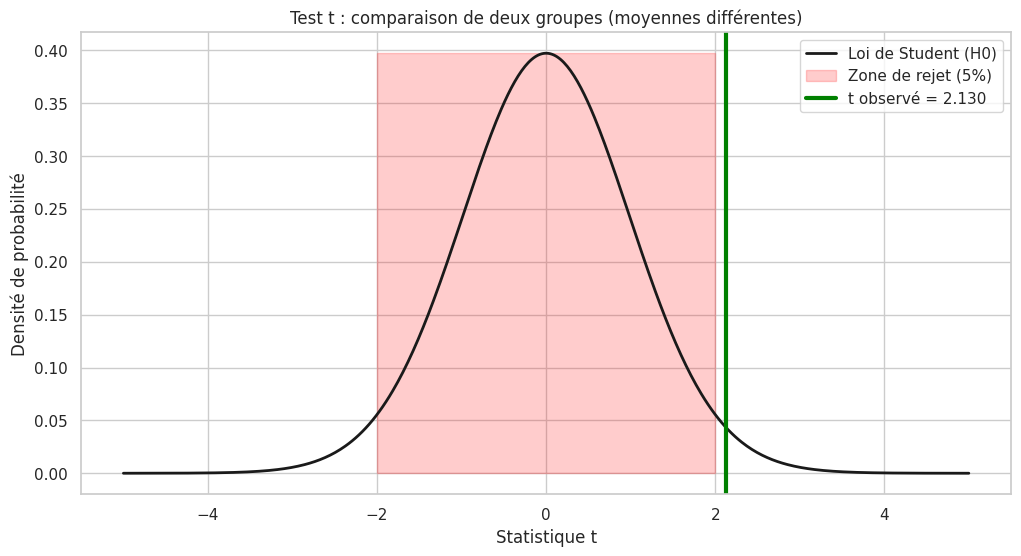


Groupe A : mean = 4.624, std = 1.800
Groupe B : mean = 3.015, std = 3.724

t observ√©     = 2.130
Degr√©s libert√© ‚âà 58
p-value       ‚âà 0.037



In [29]:
# Test de Student : comparaison de deux groupes (moyennes diff√©rentes)
# -------------------------------------------------------------------
# Objectif :
# - G√©n√©rer deux √©chantillons avec moyennes et variances diff√©rentes
# - Calculer la statistique t et la comparer √† la loi de Student sous H0
# - Visualiser √† la fois les donn√©es brutes et l'interpr√©tation statistique

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Style graphique
sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------------------------------------------
# Param√®tres des √©chantillons
# -------------------------------------------------------------------
n_users = 30
mu_A = 5.0       # moyenne th√©orique du groupe A
mu_B = 3.5       # moyenne th√©orique du groupe B
sigma_A = 2.0    # √©cart-type du groupe A
sigma_B = 4.0    # √©cart-type du groupe B

# -------------------------------------------------------------------
# G√©n√©ration des donn√©es
# -------------------------------------------------------------------
errors_A = np.random.normal(mu_A, sigma_A, n_users)
errors_B = np.random.normal(mu_B, sigma_B, n_users)

# Statistiques descriptives
mean_A, mean_B = np.mean(errors_A), np.mean(errors_B)
std_A, std_B   = np.std(errors_A, ddof=1), np.std(errors_B, ddof=1)

# -------------------------------------------------------------------
# Visualisation des distributions empiriques
# -------------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.histplot(errors_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(errors_B, color='salmon', kde=True, stat='density', label='Groupe B')

plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f"Moyenne A = {mean_A:.2f}")
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f"Moyenne B = {mean_B:.2f}")

plt.title("Distribution des √©chantillons (moyennes diff√©rentes)")
plt.xlabel("Valeur")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# Calcul de la statistique t
# -------------------------------------------------------------------
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_users + std_B**2/n_users)
df = n_users + n_users - 2  # approximation classique
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# -------------------------------------------------------------------
# Visualisation de la loi de Student et du t observ√©
# -------------------------------------------------------------------
plt.figure(figsize=(12,6))

# Loi de Student sous H0
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='Loi de Student (H0)')

# Zone critique (alpha = 5%)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1],
                  color='red', alpha=0.2, label='Zone de rejet (5%)')

# Valeur observ√©e
plt.axvline(t_stat, color='green', lw=3, label=f't observ√© = {t_stat:.3f}')

plt.title("Test t : comparaison de deux groupes (moyennes diff√©rentes)")
plt.xlabel("Statistique t")
plt.ylabel("Densit√© de probabilit√©")
plt.legend()
plt.show()

# -------------------------------------------------------------------
# R√©sultats num√©riques
# -------------------------------------------------------------------
print(f"""
Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}
Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}

t observ√©     = {t_stat:.3f}
Degr√©s libert√© ‚âà {df}
p-value       ‚âà {p_value:.3f}
""")


Moyenne √©chantillon = 4.673
Ecart-type √©chantillon = 1.913

t-statistique = 0.452
Degr√©s de libert√© = 24
p-value = 0.655


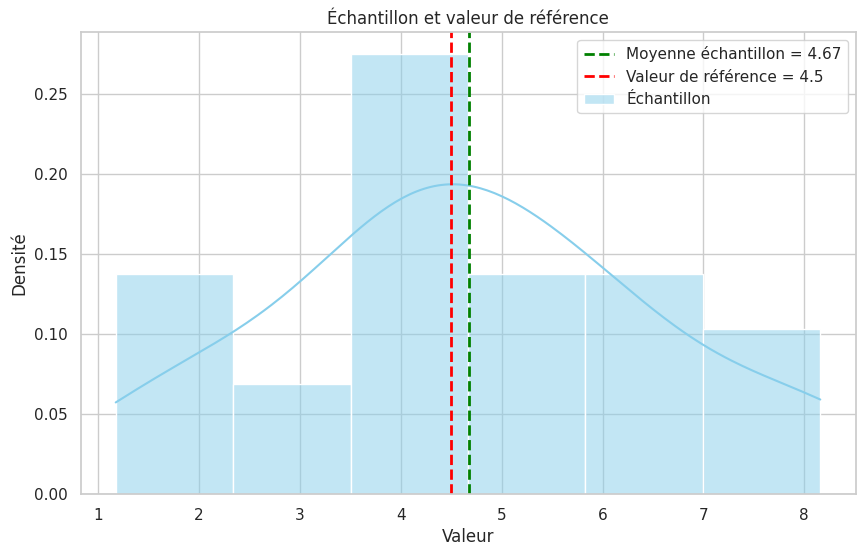

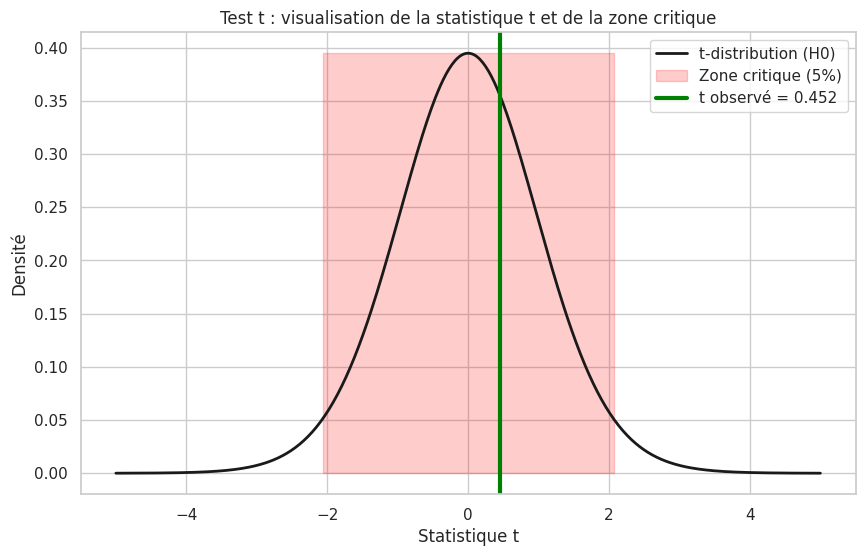

üëâ On ne rejette pas H0 : pas de diff√©rence significative d√©tect√©e


In [31]:
# Test t pour un √©chantillon (one-sample t-test) avec visualisation de la t-distribution
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. G√©n√©rer un √©chantillon
# -------------------------------
n = 25                       # taille de l'√©chantillon
mu_true = 5                  # vraie moyenne sous-jacente
sigma = 2                    # √©cart-type sous-jacent

sample = np.random.normal(mu_true, sigma, n)

# Moyenne et √©cart-type observ√©s
x_bar = np.mean(sample)
s = np.std(sample, ddof=1)

print(f"Moyenne √©chantillon = {x_bar:.3f}")
print(f"Ecart-type √©chantillon = {s:.3f}")

# -------------------------------
# 2. Hypoth√®ses
# -------------------------------
mu_0 = 4.5   # valeur de r√©f√©rence
# H0 : moyenne = mu_0
# H1 : moyenne ‚â† mu_0

# -------------------------------
# 3. Calcul du t-statistique
# -------------------------------
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
df = n - 1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"\nt-statistique = {t_stat:.3f}")
print(f"Degr√©s de libert√© = {df}")
print(f"p-value = {p_value:.3f}")

# -------------------------------
# 4. Visualisation de l'√©chantillon
# -------------------------------
plt.figure(figsize=(10,6))
sns.histplot(sample, kde=True, color='skyblue', stat='density', label='√âchantillon')
plt.axvline(x_bar, color='green', linestyle='--', lw=2, label=f'Moyenne √©chantillon = {x_bar:.2f}')
plt.axvline(mu_0, color='red', linestyle='--', lw=2, label=f'Valeur de r√©f√©rence = {mu_0}')
plt.title("√âchantillon et valeur de r√©f√©rence")
plt.xlabel("Valeur")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 5. Visualisation de la t-distribution
# -------------------------------
plt.figure(figsize=(10,6))

# t-distribution th√©orique sous H0
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution (H0)')

# Zone critique bilat√©rale (alpha = 0.05)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observ√©
plt.axvline(t_stat, color='green', lw=3, label=f't observ√© = {t_stat:.3f}')

plt.title("Test t : visualisation de la statistique t et de la zone critique")
plt.xlabel("Statistique t")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 6. Interpr√©tation
# -------------------------------
if p_value < 0.05:
    print("üëâ On rejette H0 : la moyenne diff√®re significativement de mu_0")
else:
    print("üëâ On ne rejette pas H0 : pas de diff√©rence significative d√©tect√©e")


Groupe A : mean = 4.673, std = 1.913
Groupe B : mean = 3.281, std = 2.314

t-statistique = 2.317
Degr√©s de libert√© ‚âà 48
p-value ‚âà 0.025


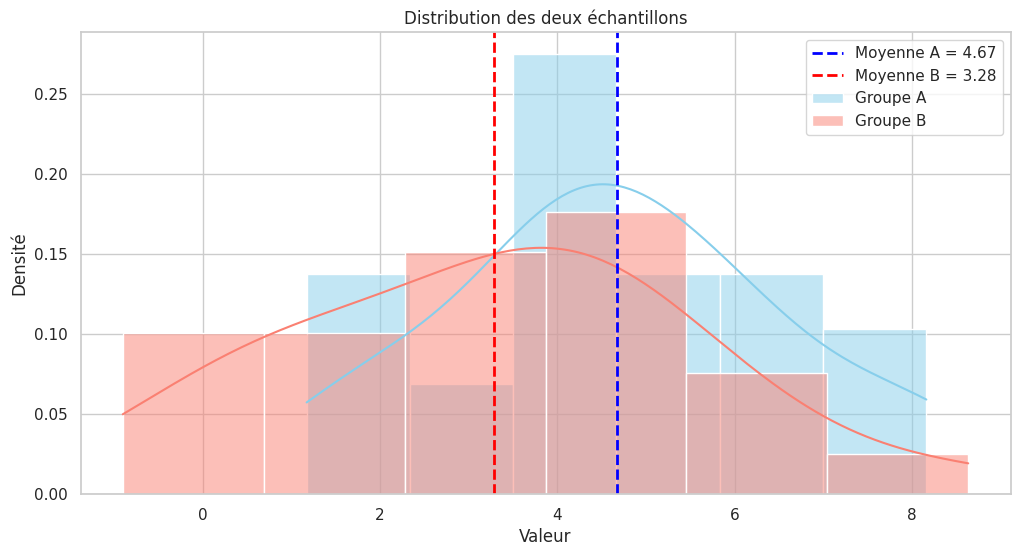

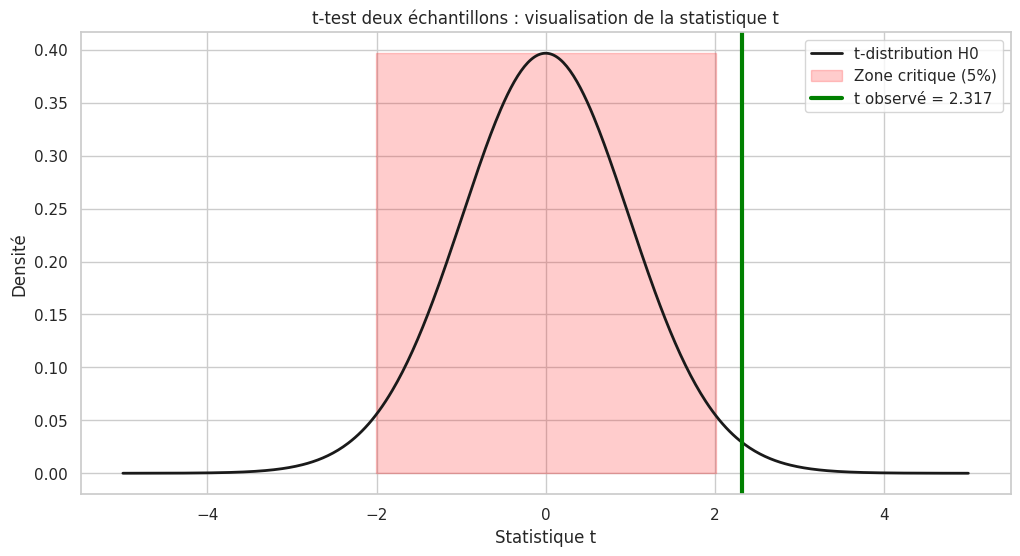

üëâ On rejette H0 : les moyennes des deux groupes diff√®rent significativement


In [32]:
# Test t pour deux √©chantillons ind√©pendants avec visualisation
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. Param√®tres des √©chantillons
# -------------------------------
n_A = 25
n_B = 25
mu_A = 5.0
mu_B = 4.0   # moyenne diff√©rente
sigma_A = 2.0
sigma_B = 2.5

# -------------------------------
# 2. G√©n√©rer les √©chantillons
# -------------------------------
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)

mean_A, mean_B = np.mean(sample_A), np.mean(sample_B)
std_A, std_B = np.std(sample_A, ddof=1), np.std(sample_B, ddof=1)

print(f"Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}")
print(f"Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}")

# -------------------------------
# 3. Calculer t et degr√©s de libert√©
# -------------------------------
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_A + std_B**2/n_B)
df = n_A + n_B - 2  # approximation classique pour var. in√©gales (on peut utiliser Welch sinon)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"\nt-statistique = {t_stat:.3f}")
print(f"Degr√©s de libert√© ‚âà {df}")
print(f"p-value ‚âà {p_value:.3f}")

# -------------------------------
# 4. Visualisation des √©chantillons
# -------------------------------
plt.figure(figsize=(12,6))
sns.histplot(sample_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(sample_B, color='salmon', kde=True, stat='density', label='Groupe B')
plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f'Moyenne A = {mean_A:.2f}')
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f'Moyenne B = {mean_B:.2f}')
plt.title("Distribution des deux √©chantillons")
plt.xlabel("Valeur")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 5. Visualisation t-distribution avec zone critique et t observ√©
# -------------------------------
plt.figure(figsize=(12,6))

# t-distribution th√©orique sous H0 (diff√©rence moyenne = 0)
x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution H0')

# Zone critique bilat√©rale (alpha = 0.05)
alpha = 0.05
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observ√©
plt.axvline(t_stat, color='green', lw=3, label=f't observ√© = {t_stat:.3f}')

plt.title("t-test deux √©chantillons : visualisation de la statistique t")
plt.xlabel("Statistique t")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 6. Interpr√©tation
# -------------------------------
if p_value < 0.05:
    print("üëâ On rejette H0 : les moyennes des deux groupes diff√®rent significativement")
else:
    print("üëâ On ne rejette pas H0 : pas de diff√©rence significative d√©tect√©e")


Groupe A : mean = 4.673, std = 1.913
Groupe B : mean = 3.281, std = 2.314
Intervalle de confiance √† 95% pour la diff√©rence de moyennes : [0.184, 2.599]


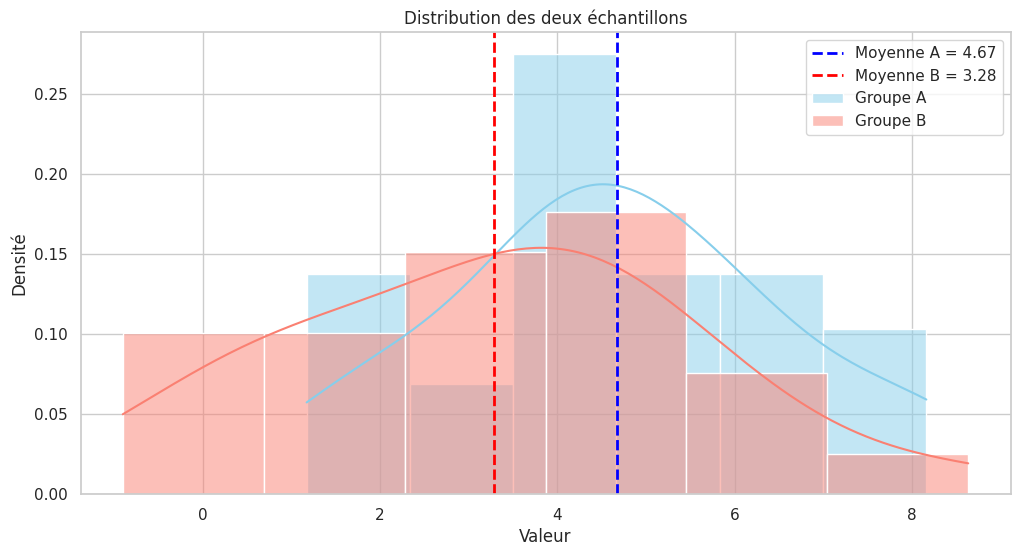

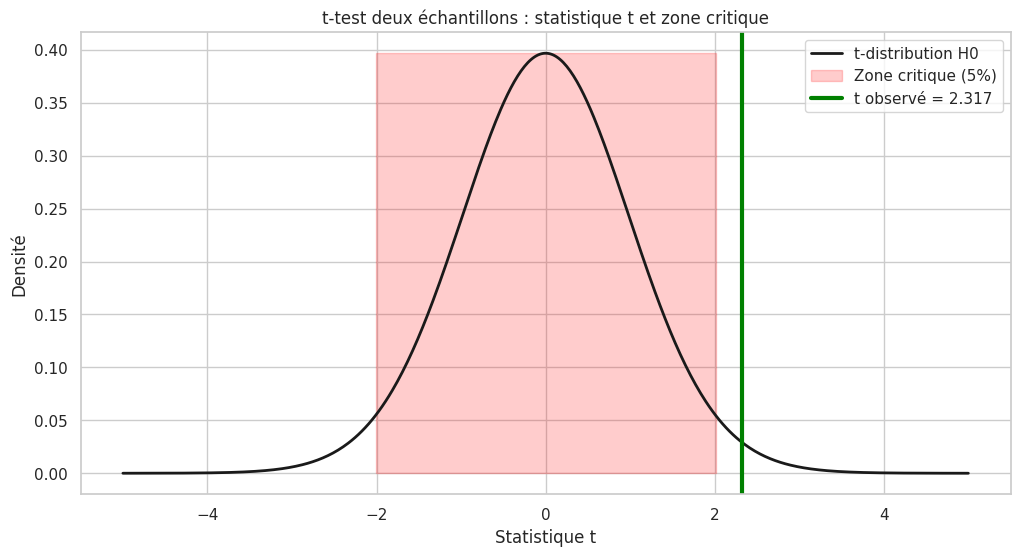

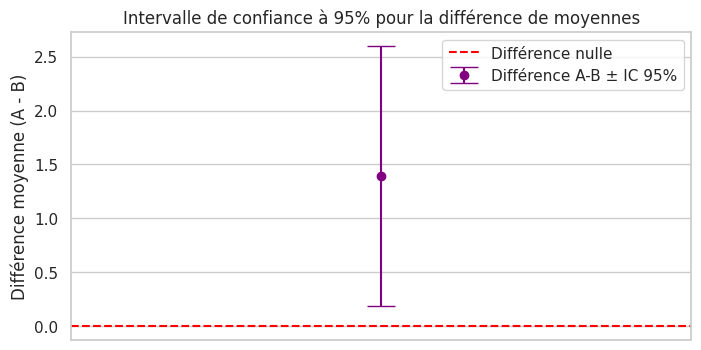

üëâ On rejette H0 : les moyennes des deux groupes diff√®rent significativement


In [33]:
# Test t pour deux √©chantillons ind√©pendants avec visualisation et intervalle de confiance
# -------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# -------------------------------
# 1. Param√®tres des √©chantillons
# -------------------------------
n_A = 25
n_B = 25
mu_A = 5.0
mu_B = 4.0   # moyenne diff√©rente
sigma_A = 2.0
sigma_B = 2.5

# -------------------------------
# 2. G√©n√©rer les √©chantillons
# -------------------------------
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)

mean_A, mean_B = np.mean(sample_A), np.mean(sample_B)
std_A, std_B = np.std(sample_A, ddof=1), np.std(sample_B, ddof=1)

print(f"Groupe A : mean = {mean_A:.3f}, std = {std_A:.3f}")
print(f"Groupe B : mean = {mean_B:.3f}, std = {std_B:.3f}")

# -------------------------------
# 3. Calculer t, df et p-value
# -------------------------------
# t-test classique pour deux √©chantillons ind√©pendants
t_stat = (mean_A - mean_B) / np.sqrt(std_A**2/n_A + std_B**2/n_B)
df = n_A + n_B - 2  # approximation
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# -------------------------------
# 4. Intervalle de confiance pour la diff√©rence de moyennes
# -------------------------------
alpha = 0.05
se_diff = np.sqrt(std_A**2/n_A + std_B**2/n_B)  # erreur standard de la diff√©rence
t_crit = stats.t.ppf(1 - alpha/2, df)          # valeur critique
ci_lower = (mean_A - mean_B) - t_crit * se_diff
ci_upper = (mean_A - mean_B) + t_crit * se_diff

print(f"Intervalle de confiance √† 95% pour la diff√©rence de moyennes : [{ci_lower:.3f}, {ci_upper:.3f}]")

# -------------------------------
# 5. Visualisation des √©chantillons
# -------------------------------
plt.figure(figsize=(12,6))
sns.histplot(sample_A, color='skyblue', kde=True, stat='density', label='Groupe A')
sns.histplot(sample_B, color='salmon', kde=True, stat='density', label='Groupe B')
plt.axvline(mean_A, color='blue', linestyle='--', lw=2, label=f'Moyenne A = {mean_A:.2f}')
plt.axvline(mean_B, color='red', linestyle='--', lw=2, label=f'Moyenne B = {mean_B:.2f}')
plt.title("Distribution des deux √©chantillons")
plt.xlabel("Valeur")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 6. Visualisation t-distribution, zone critique et t observ√©
# -------------------------------
plt.figure(figsize=(12,6))

x = np.linspace(-5, 5, 500)
t_pdf = stats.t.pdf(x, df)
plt.plot(x, t_pdf, 'k-', lw=2, label='t-distribution H0')

# Zone critique bilat√©rale
crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
plt.fill_betweenx([0, max(t_pdf)], crit[0], crit[1], color='red', alpha=0.2, label='Zone critique (5%)')

# t observ√©
plt.axvline(t_stat, color='green', lw=3, label=f't observ√© = {t_stat:.3f}')

plt.title("t-test deux √©chantillons : statistique t et zone critique")
plt.xlabel("Statistique t")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

# -------------------------------
# 7. Visualisation de l'intervalle de confiance pour la diff√©rence
# -------------------------------
plt.figure(figsize=(8,4))
plt.errorbar(0, mean_A - mean_B, yerr=t_crit*se_diff, fmt='o', color='purple', capsize=10, label='Diff√©rence A-B ¬± IC 95%')
plt.axhline(0, color='red', linestyle='--', label='Diff√©rence nulle')
plt.xlim(-1,1)
plt.title("Intervalle de confiance √† 95% pour la diff√©rence de moyennes")
plt.ylabel("Diff√©rence moyenne (A - B)")
plt.xticks([])
plt.legend()
plt.show()

# -------------------------------
# 8. Interpr√©tation
# -------------------------------
if p_value < alpha:
    print("üëâ On rejette H0 : les moyennes des deux groupes diff√®rent significativement")
else:
    print("üëâ On ne rejette pas H0 : pas de diff√©rence significative d√©tect√©e")


# XI2

=== 1Ô∏è‚É£ Test d'ajustement (goodness-of-fit) ===

Fr√©quences observ√©es : [18 20 22 19 21 20]
Fr√©quences attendues : [20 20 20 20 20 20]
Chi¬≤ = 0.500
p-value = 0.992
üëâ On ne rejette pas H0 : aucune preuve que le d√© soit biais√©



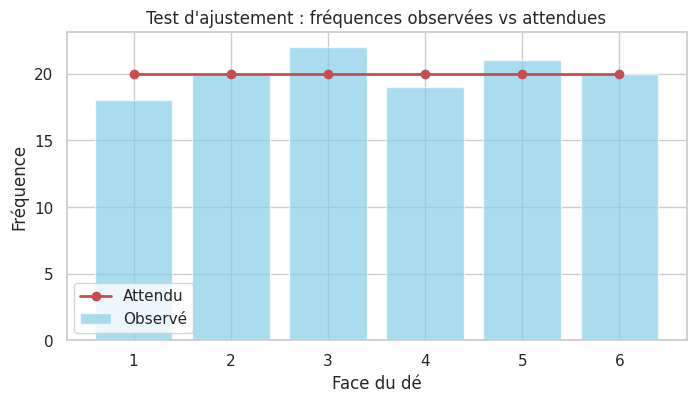

=== 2Ô∏è‚É£ Test d'ind√©pendance ===

Tableau observ√© :
[[30 20]
 [25 25]]

Tableau attendu si ind√©pendance :
[[27.5 22.5]
 [27.5 22.5]]

Chi¬≤ = 0.646, df = 1, p-value = 0.421
üëâ On ne rejette pas H0 : aucune preuve de d√©pendance



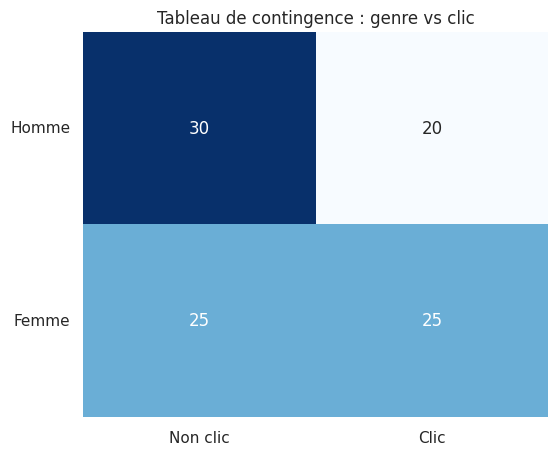

=== 3Ô∏è‚É£ Test d'homog√©n√©it√© ===

Tableau observ√© :
[[30 20 10]
 [25 25 10]
 [20 30 10]]

Tableau attendu si homog√©n√©it√© :
[[25. 25. 10.]
 [25. 25. 10.]
 [25. 25. 10.]]

Chi¬≤ = 4.000, df = 4, p-value = 0.406
üëâ On ne rejette pas H0 : aucune preuve de diff√©rence



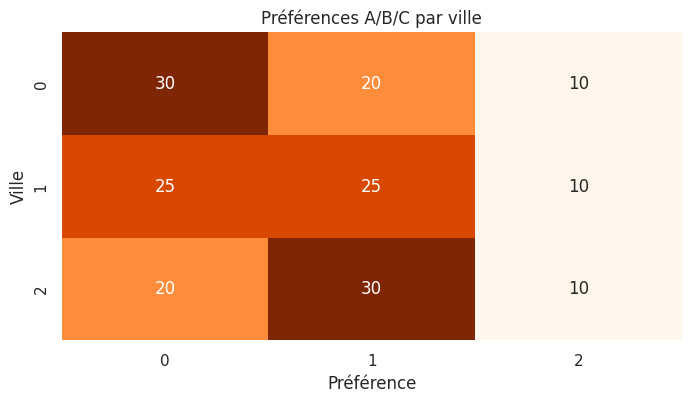

In [40]:
# --------------------------------------------------
# Chi¬≤ tests : trois cas pratiques pour Data Science
# Version lisible et p√©dagogique
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
np.random.seed(42)

# ===============================
# 1Ô∏è‚É£ Test d'ajustement (goodness-of-fit)
# ===============================
print("=== 1Ô∏è‚É£ Test d'ajustement (goodness-of-fit) ===\n")
# Ex : lancer un d√© 120 fois
observed = np.array([18, 20, 22, 19, 21, 20])
expected = np.array([20, 20, 20, 20, 20, 20])  # distribution uniforme attendue

chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Fr√©quences observ√©es : {observed}")
print(f"Fr√©quences attendues : {expected}")
print(f"Chi¬≤ = {chi2_stat:.3f}")
print(f"p-value = {p_val:.3f}")
if p_val < 0.05:
    print("üëâ On rejette H0 : le d√© n'est pas √©quilibr√©\n")
else:
    print("üëâ On ne rejette pas H0 : aucune preuve que le d√© soit biais√©\n")

# Visualisation
plt.figure(figsize=(8,4))
plt.bar(range(1,7), observed, color='skyblue', alpha=0.7, label='Observ√©')
plt.plot(range(1,7), expected, 'ro-', lw=2, label='Attendu')
plt.title("Test d'ajustement : fr√©quences observ√©es vs attendues")
plt.xlabel("Face du d√©")
plt.ylabel("Fr√©quence")
plt.legend()
plt.show()

# ===============================
# 2Ô∏è‚É£ Test d'ind√©pendance
# ===============================
print("=== 2Ô∏è‚É£ Test d'ind√©pendance ===\n")
# Ex : Genre vs Conversion
observed = np.array([[30, 20], [25, 25]])  # Hommes/Femmes x Non clic/Clic
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

print("Tableau observ√© :")
print(observed)
print("\nTableau attendu si ind√©pendance :")
print(np.round(expected,2))
print(f"\nChi¬≤ = {chi2_stat:.3f}, df = {dof}, p-value = {p_val:.3f}")
if p_val < 0.05:
    print("üëâ On rejette H0 : genre et clic ne sont pas ind√©pendants\n")
else:
    print("üëâ On ne rejette pas H0 : aucune preuve de d√©pendance\n")

# Visualisation
plt.figure(figsize=(6,5))
sns.heatmap(observed, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks([0.5,1.5], ['Non clic', 'Clic'])
plt.yticks([0.5,1.5], ['Homme', 'Femme'], rotation=0)
plt.title("Tableau de contingence : genre vs clic")
plt.show()

# ===============================
# 3Ô∏è‚É£ Test d'homog√©n√©it√©
# ===============================
print("=== 3Ô∏è‚É£ Test d'homog√©n√©it√© ===\n")
# Ex : pr√©f√©rences A/B/C dans 3 villes
observed = np.array([[30, 20, 10],
                     [25, 25, 10],
                     [20, 30, 10]])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

print("Tableau observ√© :")
print(observed)
print("\nTableau attendu si homog√©n√©it√© :")
print(np.round(expected,2))
print(f"\nChi¬≤ = {chi2_stat:.3f}, df = {dof}, p-value = {p_val:.3f}")
if p_val < 0.05:
    print("üëâ On rejette H0 : au moins une ville a une distribution de pr√©f√©rences diff√©rente\n")
else:
    print("üëâ On ne rejette pas H0 : aucune preuve de diff√©rence\n")

# Visualisation
plt.figure(figsize=(8,4))
sns.heatmap(observed, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Pr√©f√©rences A/B/C par ville")
plt.xlabel("Pr√©f√©rence")
plt.ylabel("Ville")
plt.show()
